In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [2]:
diamonds = pd.read_csv('diamonds_original.csv')

In [3]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [4]:
priceClasses = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
classColumn = []
d = diamonds['price']
for i in d:
  if i >= 0 and i <= 5000:
    classColumn.append(priceClasses[0])
  elif i <= 10000:
    classColumn.append(priceClasses[1])
  elif i <= 15000:
    classColumn.append(priceClasses[2])
  elif i > 15000:
    classColumn.append(priceClasses[3])

In [5]:
s = pd.Series(classColumn)
diamonds.reset_index(inplace=True)
diamonds.drop('index', axis='columns', inplace=True)
diamonds['class'] = s
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price,class
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0,"(5000, 10000]"
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0,"[0, 5000]"
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0,"[0, 5000]"
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0,"(5000, 10000]"
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0,"[0, 5000]"
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0,"[0, 5000]"
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0,"[0, 5000]"
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0,"[0, 5000]"


In [6]:
feature_names = ['carat', 'price']

In [7]:
X = diamonds[feature_names]
X

,carat,price
0,1.26,6546.0
1,0.80,3030.0
2,0.56,1915.0
3,1.51,6936.0
4,0.33,646.0
...,...,...
53935,1.02,4796.0
53936,0.93,3750.0
53937,0.30,491.0
53938,0.36,807.0


In [8]:
y = diamonds['class']
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
53935        [0, 5000]
53936        [0, 5000]
53937        [0, 5000]
53938        [0, 5000]
53939        [0, 5000]
Name: class, Length: 53940, dtype: object

In [9]:
undersampler = RandomUnderSampler(random_state = 42)

In [10]:
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [11]:
X_undersampled

,carat,price
0,1.54,11795.0
1,2.45,11830.0
2,1.14,10878.0
3,1.30,12932.0
4,1.52,11206.0
...,...,...
6615,0.91,3936.0
6616,0.70,1966.0
6617,0.30,665.0
6618,0.43,792.0


In [12]:
X = X_undersampled
X

,carat,price
0,1.54,11795.0
1,2.45,11830.0
2,1.14,10878.0
3,1.30,12932.0
4,1.52,11206.0
...,...,...
6615,0.91,3936.0
6616,0.70,1966.0
6617,0.30,665.0
6618,0.43,792.0


In [13]:
y_undersampled.value_counts()

(10000, 15000]    1655
(5000, 10000]     1655
15000+            1655
[0, 5000]         1655
Name: class, dtype: int64

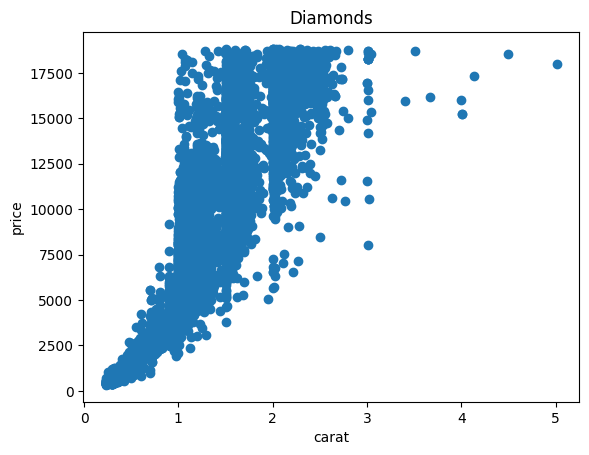

In [14]:
plt.scatter(X['carat'], X['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title("Diamonds")
plt.show()

In [15]:
scaler = MinMaxScaler()

In [16]:
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

,carat,price
0,0.274059,0.620046
1,0.464435,0.621939
2,0.190377,0.570471
3,0.223849,0.681516
4,0.269874,0.588203
...,...,...
6615,0.142259,0.195167
6616,0.098326,0.088663
6617,0.014644,0.018327
6618,0.041841,0.025193


***

Pomocne funkcije za izvestaj o modelu

In [17]:
def plot_search(X):
  ks = range(2, 11)
  affinities = ['rbf', 'nearest_neighbors']
  fig = plt.figure(figsize=(10, 50))
  idx = 1
  silhouette = []
  for k in ks:
      for aff in affinities:
          model = SpectralClustering(n_clusters=k, affinity=aff, random_state=42, n_init=3)
          model.fit(X)
          if aff == 'nearest_neighbors':
              silhouette.append(silhouette_score(X, model.labels_))

          fig.add_subplot(len(ks), len(affinities), idx)
          idx += 1
          for label in range(k):
              cluster = X_undersampled[model.labels_ == label]
              plt.scatter(cluster['carat'], cluster['price'])
          
          s = silhouette_score(X, model.labels_)
          plt.title(f'k={k}, aff={aff}, s={s:.4f}')
          
  plt.tight_layout()

  return silhouette

## SpectralClustering

In [18]:
sc = SpectralClustering(random_state=42)

In [19]:
sc.fit(X)

SpectralClustering(random_state=42)

In [20]:
affinity = pd.DataFrame(sc.affinity_matrix_)
affinity.shape

(6620, 6620)

In [21]:
clustered_data = X.copy()
clustered_data['cluster'] = sc.labels_
clustered_data

,carat,price,cluster
0,0.274059,0.620046,5
1,0.464435,0.621939,1
2,0.190377,0.570471,0
3,0.223849,0.681516,5
4,0.269874,0.588203,5
...,...,...,...
6615,0.142259,0.195167,6
6616,0.098326,0.088663,6
6617,0.014644,0.018327,3
6618,0.041841,0.025193,3


In [22]:
clustered_data['cluster'].value_counts()

5    1523
0    1145
6    1109
3     970
1     717
7     713
2     434
4       9
Name: cluster, dtype: int64

In [23]:
silhouette_values = silhouette_samples(X, sc.labels_)
silhouette_values

array([ 0.04025471,  0.01649716, -0.03044546, ...,  0.8802176 ,
        0.86811951,  0.88926554])

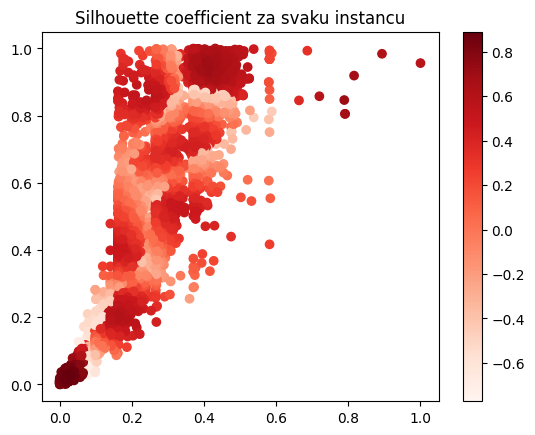

In [24]:
plt.scatter(X['carat'], X['price'], c = silhouette_values, cmap="Reds")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu")
plt.show()

***

Trazenje najboljeg k 

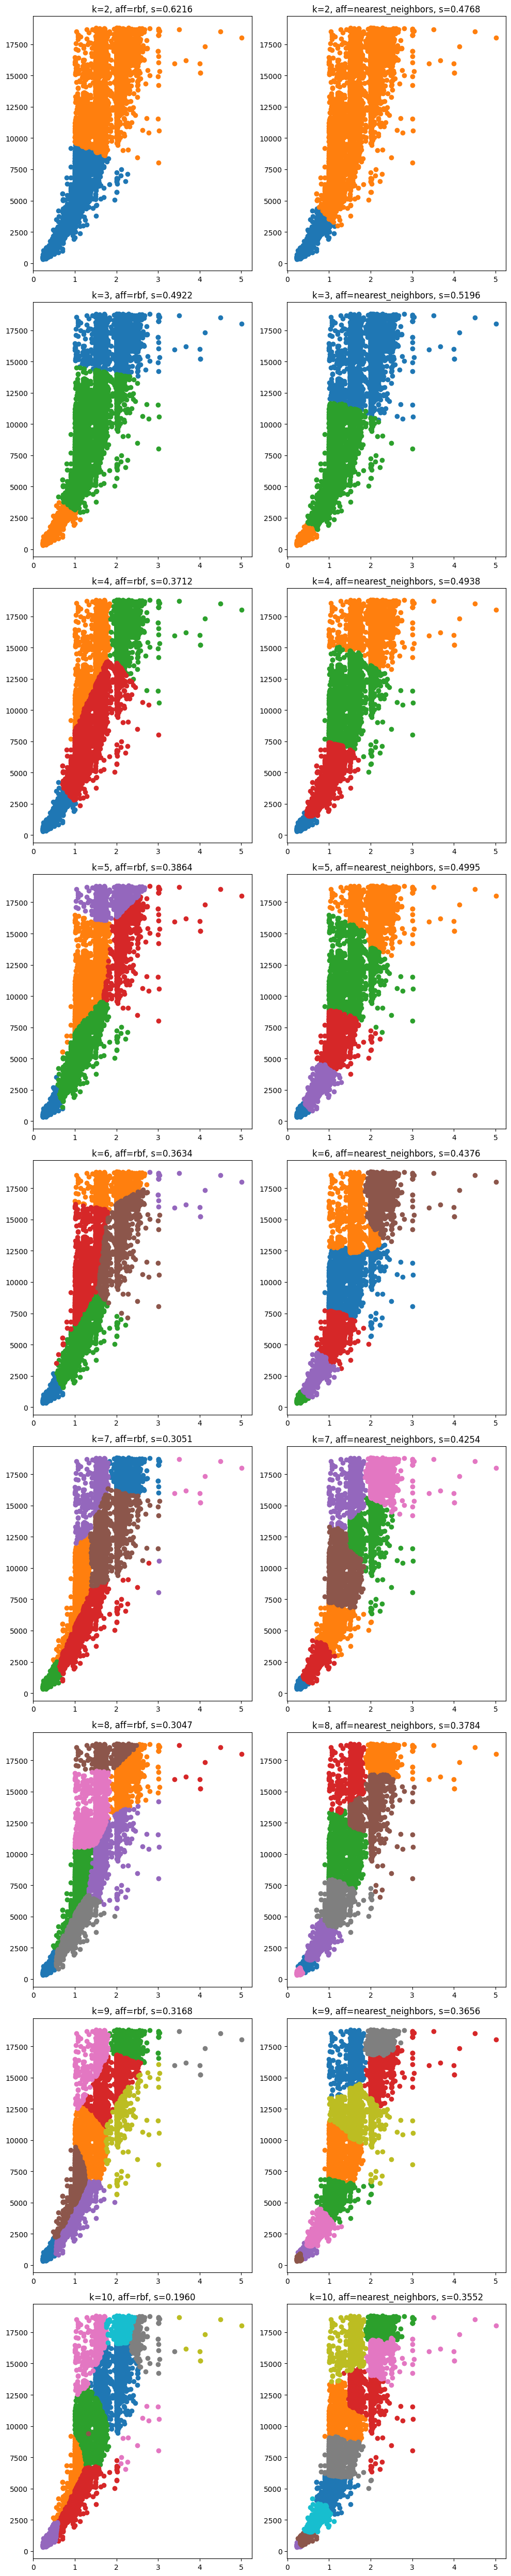

In [25]:
silhouette = plot_search(X)

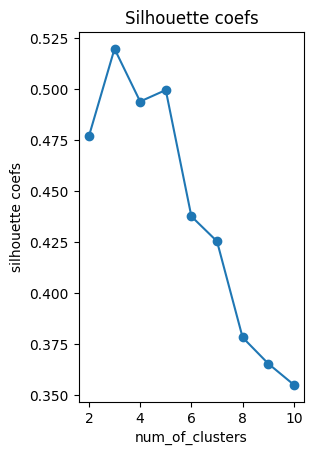

In [26]:
ks = range(2, 11)

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.47681685967655313
For n_clusters = 3 The average silhouette_score is : 0.5196358287705952
For n_clusters = 4 The average silhouette_score is : 0.49383544725424544
For n_clusters = 5 The average silhouette_score is : 0.499453987832683
For n_clusters = 6 The average silhouette_score is : 0.4376330332533335


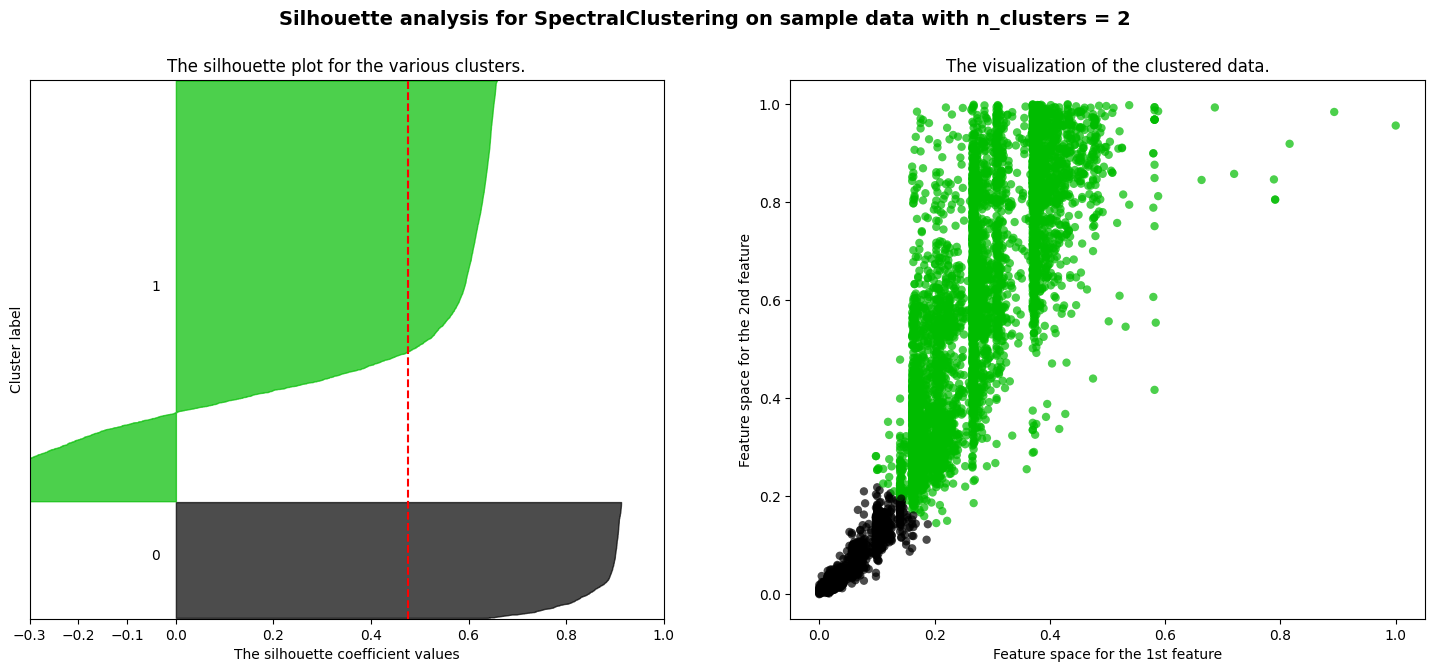

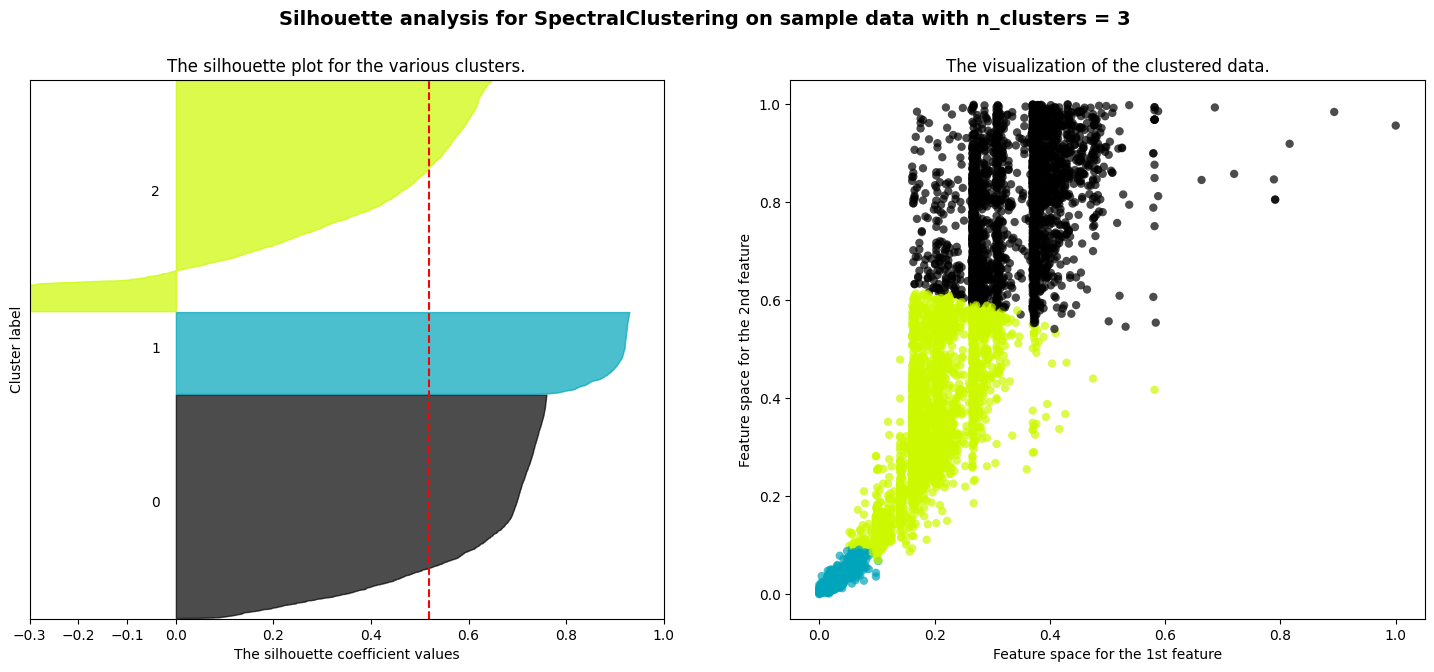

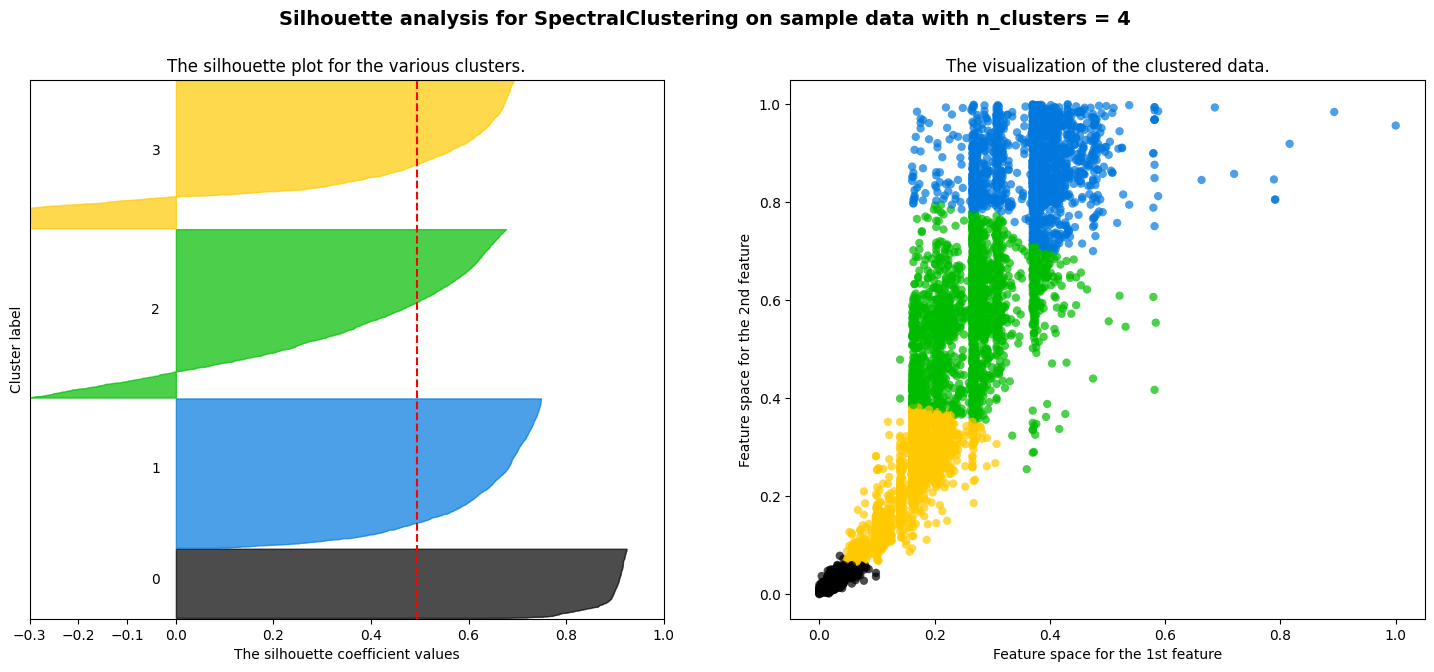

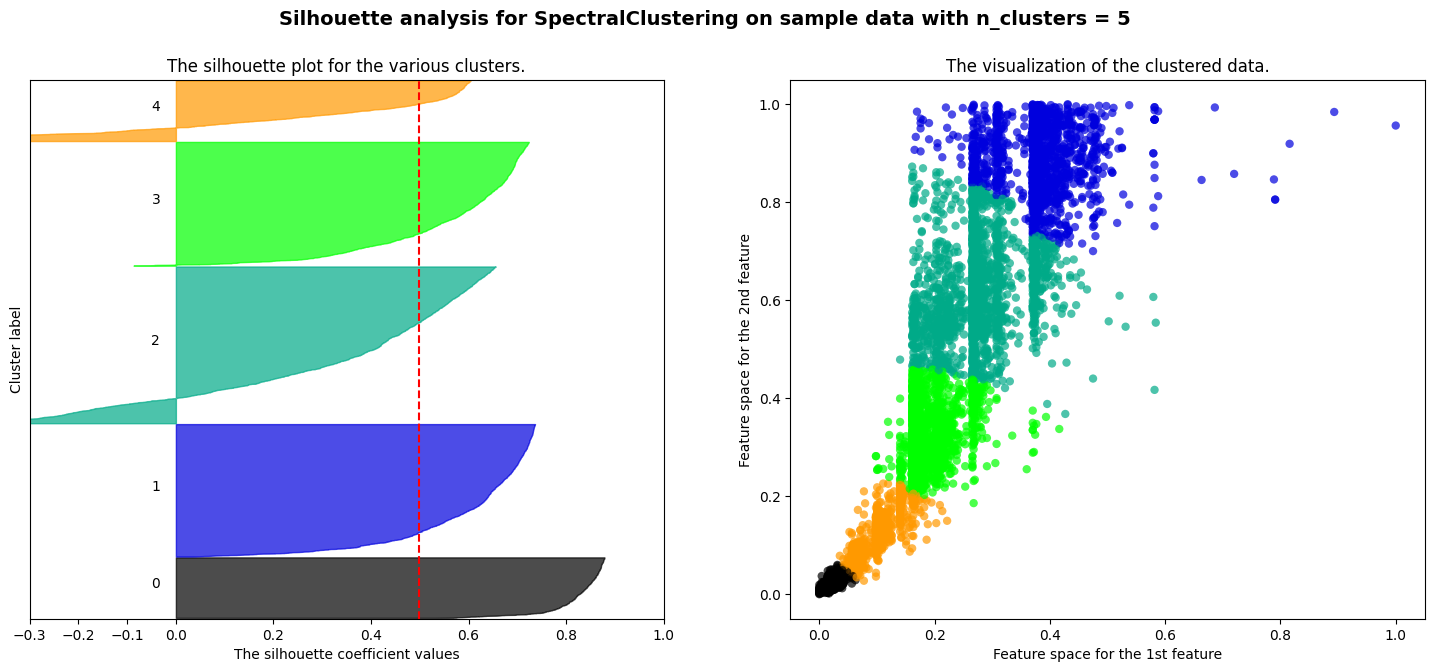

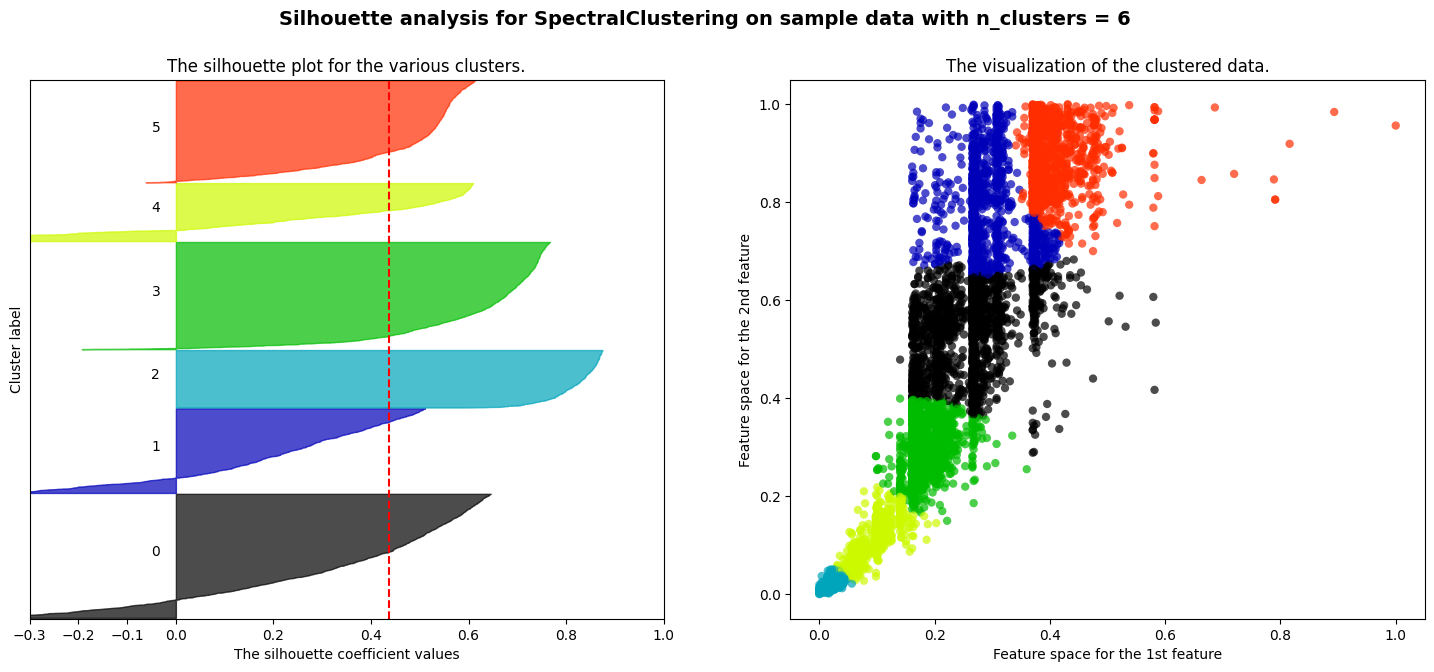

In [27]:
# pomoćna funkcija za silhouette diagram plot (preuzeto sa https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
import matplotlib.cm as cm

for n_clusters in [2, 3, 4, 5, 6]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_init=3, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['carat'], X['price'], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for SpectralClustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Najbolji **silhouette_score** dobijamo za n=3 pa cemo izabrati taj model

In [28]:
model = SpectralClustering(n_clusters = 3, affinity='nearest_neighbors', n_init=3, random_state=42)

In [29]:
model.fit(X)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3, n_init=3,
                   random_state=42)

In [30]:
silhouette_values = silhouette_samples(X, model.labels_)
silhouette_values

array([0.24322388, 0.36799411, 0.1954362 , ..., 0.92031001, 0.91903057,
       0.92935221])

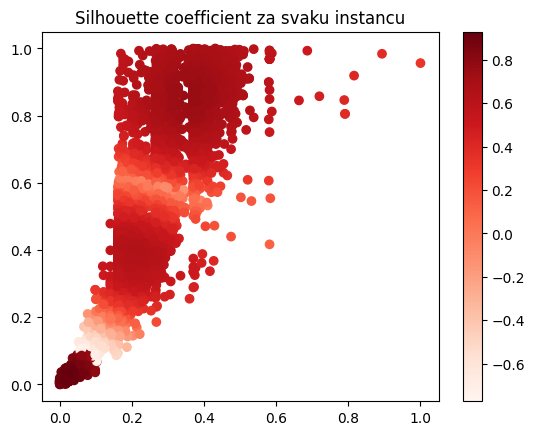

In [31]:
plt.scatter(X['carat'], X['price'], c = silhouette_values, cmap="Reds")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu")
plt.show()

In [32]:
joblib.dump(model, 'SC.pkl')

['SC.pkl']